In [1]:
import torch
import submodlib
from helper_fns import taylor_softmax_v1
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon

/home/hrenduchinta/.conda/envs/ingenious/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nsp_zero=torch.load("nsp_zero_representations.pt")

In [3]:
nsp_zero=nsp_zero[:10000]

In [4]:
data_sijs=submodlib.helper.create_kernel(X=nsp_zero, metric="cosine", method="sklearn")

In [5]:
obj=submodlib.FacilityLocationFunction(n=nsp_zero.shape[0], separate_rep=False, mode="dense", sijs=data_sijs)

In [6]:
greedyList=obj.maximize(budget=nsp_zero.shape[0]-1, optimizer="LazyGreedy", stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False, show_progress=True)

[||||||||||||||||||||]100% [Iteration 9999 of 9999]

In [7]:
partition_indices=[x[0] for x in greedyList]
gains=[x[1] for x in greedyList]

In [8]:
temperature=0.01
probs=taylor_softmax_v1(torch.from_numpy(np.array([gains])/temperature)).numpy()[0]

In [9]:
s=data_sijs[0].tolist()
for i in sorted(s, reverse=True):
    print(i)

0.9999998211860657
0.9016201496124268
0.8831627368927002
0.8818024396896362
0.8780131936073303
0.8772281408309937
0.8716323375701904
0.8715012073516846
0.8698154091835022
0.8679344654083252
0.8650622963905334
0.8637810945510864
0.8621654510498047
0.8595772981643677
0.8582517504692078
0.8581942319869995
0.8577896356582642
0.8536628484725952
0.8528308272361755
0.8526561260223389
0.8522598743438721
0.8510369062423706
0.8488427400588989
0.8485737442970276
0.8484649062156677
0.8481475710868835
0.8469576835632324
0.8456923365592957
0.8442209959030151
0.8433753252029419
0.8430069088935852
0.8427112698554993
0.8424354195594788
0.8423436284065247
0.8422704339027405
0.8422511219978333
0.840726912021637
0.8406872749328613
0.8404574990272522
0.8392033576965332
0.8387585878372192
0.8383368253707886
0.8380444049835205
0.8378543853759766
0.8366351127624512
0.8364138007164001
0.8353060483932495
0.8344007730484009
0.8342397809028625
0.8339397311210632
0.8336482644081116
0.8319249153137207
0.83176487684

In [10]:
for g in gains:
    print(g)

7385.389853268862
153.18326646089554
122.71677312254906
50.31289681792259
40.779240638017654
32.42691254615784
29.47479623556137
27.356123864650726
26.82974886894226
24.633087635040283
20.97825253009796
20.03333729505539
16.09531357884407
15.254513949155807
14.907388091087341
12.507509112358093
12.414426416158676
11.474971324205399
10.496116936206818
9.20300880074501
8.985633730888367
8.291143119335175
7.7910842299461365
7.4467615485191345
7.415654003620148
7.068948686122894
6.7695494294166565
6.5168604254722595
6.497693061828613
6.433605492115021
6.32993757724762
5.734610617160797
5.088851124048233
4.905303239822388
4.5529356598854065
4.51169353723526
4.462023377418518
4.4142937660217285
4.336107909679413
4.192362308502197
4.113916754722595
4.031104028224945
3.921055316925049
3.8897801637649536
3.8859766125679016
3.6274498403072357
3.58087694644928
3.530003309249878
3.4953574538230896
3.3504192233085632
3.3239744901657104
3.241943657398224
3.2264901399612427
3.1421051621437073
3.10709

In [11]:
cumulative_gains=[]
for g in gains:
    if len(cumulative_gains)==0:
        cumulative_gains.append(g)
    else:
        cumulative_gains.append(cumulative_gains[-1]+g)

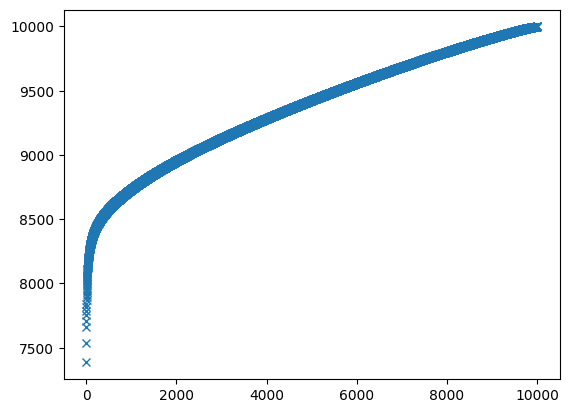

In [12]:
#plot cumulative gains
plt.plot(cumulative_gains, "x")

In [13]:
for p in probs:
    print(p)

0.9986127499925005
0.00043513638523328936
0.0002801677794844691
4.821149774121453e-05
3.196704314932979e-05
2.046980393459993e-05
1.7016947011226007e-05
1.4735543578851006e-05
1.4194222387635366e-05
1.204467150741744e-05
8.859661210743675e-06
8.115767317319519e-06
5.367478233926672e-06
4.854240296694691e-06
4.649896556626644e-06
3.357816796673556e-06
3.3119489997407993e-06
2.8667741516684006e-06
2.4372985569049744e-06
1.9237166360967787e-06
1.8433918644272838e-06
1.5983538605921446e-06
1.4328509163339719e-06
1.3242130394781246e-06
1.314612001863308e-06
1.210002379652156e-06
1.1232068491591874e-06
1.052506022800515e-06
1.0472384875502257e-06
1.0297237340691757e-06
1.0017102190584995e-06
8.484554553166694e-07
6.96887034214441e-07
6.565919875169117e-07
5.826916429372843e-07
5.743392576342902e-07
5.643626714910852e-07
5.548609475600692e-07
5.394763714219281e-07
5.117755604738272e-07
4.969775654237152e-07
4.81600173926847e-07
4.6155384145302833e-07
4.5593769938889094e-07
4.552571301729314e-

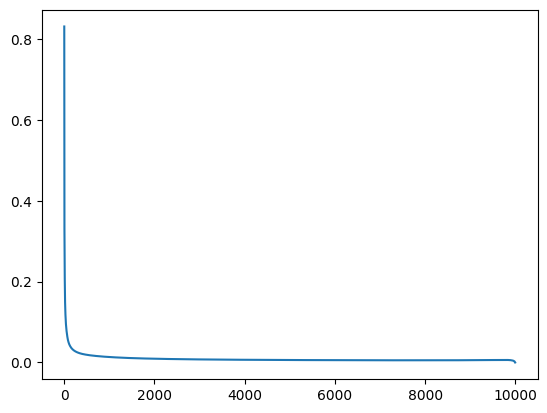

In [14]:
jensen_shannon_distances=[]
for i in range(len(probs)):
    X=np.array(probs[i:])
    X=X/np.sum(X)
    jensen_shannon_distances.append(jensenshannon(X, np.ones(len(X))/len(X)))
# plot jensen shannon distances
plt.plot(jensen_shannon_distances)

In [15]:
gain_probs=np.array(gains)/(np.array(gains).sum())

In [16]:
rng=np.random.default_rng(int(time.time()))
subsets=[]
for i in range(25):
    subsets.append(rng.choice(list(range(9999)), size=2500, replace=False, p=probs))

In [17]:
subsets=[set(s) for s in subsets]

In [18]:
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

688
215
103
70
59
56
53
52
49
49
48
45
44
43
43
42
40
39
39
39
38
38
38
38


In [19]:
N=len(subsets)
for i in range(N):
    for j in range(i+1, N):
        print(len(subsets[i].intersection(subsets[j])))

688
660
653
671
680
689
674
637
690
688
652
647
656
727
672
664
673
658
642
669
664
671
681
670
667
687
666
682
679
692
662
675
661
666
688
709
682
687
643
663
678
707
654
663
693
698
644
685
688
675
681
676
719
668
671
680
692
699
658
653
679
667
675
705
683
655
682
693
657
674
663
687
661
660
631
646
666
674
665
658
660
654
662
672
666
648
656
677
703
653
611
720
650
669
649
672
643
666
680
653
658
693
680
670
687
653
655
701
673
690
675
664
653
699
652
701
696
653
705
660
661
676
663
652
686
645
692
679
677
674
694
675
698
672
688
695
690
656
670
664
683
631
686
677
663
670
709
688
684
668
678
695
679
679
678
696
668
660
689
675
634
693
673
684
686
691
685
667
697
679
667
680
684
641
669
670
694
645
684
637
681
694
661
664
659
640
685
709
658
669
686
666
665
713
697
681
664
699
660
695
688
677
668
635
653
668
642
700
692
656
695
658
658
668
662
667
656
678
655
699
659
661
640
663
698
690
640
671
659
666
656
667
668
646
670
683
671
683
666
677
668
670
661
701
668
645
643
699
683
656


In [1]:
from datasets import load_from_disk

In [2]:
d=load_from_disk("/home/hrenduchinta/ingenious/nsp_zero")

In [3]:
d

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'special_tokens_mask', 'next_sentence_label'],
    num_rows: 18143275
})

In [1]:
import torch

/home/hrenduchinta/.conda/envs/ingenious/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder="/data-mount-hdd/subsets/bert_ingenious_11_05_2023_15:20:19"

In [3]:
subsets=[]
steps=[81140, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000, 525000, 550000, 575000, 600000, 625000, 650000, 675000, 700000, 725000, 750000, 775000, 800000, 825000, 850000, 875000, 900000, 925000, 950000, 975000]
for step in steps:
    X=torch.load(folder+"/nsp_zero_subset_indices_after_step_"+str(step)+".pt")
    subsets.append(set(X.reshape(-1,).tolist()))

In [4]:
len(subsets)

37

In [5]:
len(subsets[0])

5192793

In [6]:
len(subsets[0].intersection(subsets[1]))

1581319

In [7]:
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

1581319
557651
259485
166766
134277
120737
113474
108791
105241
102443
100108
98105
96443
94959
93644
92491
91417
90438
89543
88724
87930
87205
86597
85939
85361
84800
84284
83766
83281
82831
82429
82044
81663
81287
80923
80579


In [8]:
import pickle
import random
import numpy as np
from helper_fns import taylor_softmax_v1
import torch
import time
import math

with open("/data-mount-hdd/subsets/bert_ingenious_11_05_2023_15:20:19/nsp_zero_gains_after_step_81140.pkl", "rb") as f:
    gains=pickle.load(f)
# with open("/data-mount-hdd/subsets/bert_ingenious_11_05_2023_15:20:19/nsp_one_gains_after_step_81140.pkl", "rb") as f:
#     gains_nsp_one=pickle.load(f)
# with open("/data-mount-hdd/subsets/bert_ingenious_11_05_2023_15:20:19/nsp_zero_partition_indices_after_step_81140.pkl", "rb") as f:
#     partition_indices_nsp_zero=pickle.load(f)
# with open("/data-mount-hdd/subsets/bert_ingenious_11_05_2023_15:20:19/nsp_one_partition_indices_after_step_81140.pkl", "rb") as f:
#     partition_indices_nsp_one=pickle.load(f)

# batch_indices_nsp_zero=list(range(sum([len(g) for g in gains_nsp_zero])))
# batch_indices_nsp_one=list(range(sum([len(g) for g in gains_nsp_one])))

# greedyList_nsp_zero=[]
# i=0
# for p in gains_nsp_zero:
#     greedyList_nsp_zero.append(greedyIdx_nsp_zero[i:i+len(p)])         
#     i+=len(p)

In [11]:
len(gains[0]), len(gains[0])//4

(12095, 3023)

In [17]:
temperature=1
probs=taylor_softmax_v1(torch.from_numpy(np.array([gains[0]])/temperature)).numpy()[0]
rng=np.random.default_rng(int(time.time()))
subsets=[]
for i in range(25):
    subsets.append(set(rng.choice(list(range(len(probs))), size=3023, replace=False, p=probs)))
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

859
271
125
82
71
68
65
63
61
61
61
61
61
60
60
60
58
58
58
58
57
57
56
55


In [13]:
temperature=0.1
probs=taylor_softmax_v1(torch.from_numpy(np.array([gains[0]])/temperature)).numpy()[0]
rng=np.random.default_rng(int(time.time()))
subsets=[]
for i in range(25):
    subsets.append(set(rng.choice(list(range(len(probs))), size=3023, replace=False, p=probs)))
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

1040
555
413
340
308
289
282
272
262
256
252
248
244
238
236
233
226
225
224
223
223
220
217
216


In [14]:
temperature=0.01
probs=taylor_softmax_v1(torch.from_numpy(np.array([gains[0]])/temperature)).numpy()[0]
rng=np.random.default_rng(int(time.time()))
subsets=[]
for i in range(25):
    subsets.append(set(rng.choice(list(range(len(probs))), size=3023, replace=False, p=probs)))
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

1198
720
570
500
453
431
415
400
388
375
366
361
356
352
345
342
336
330
328
323
323
320
318
316


In [21]:
temperature=0.001
probs=taylor_softmax_v1(torch.from_numpy(np.array([gains[0]])/temperature)).numpy()[0]
rng=np.random.default_rng(int(time.time()))
subsets=[]
for i in range(25):
    subsets.append(set(rng.choice(list(range(len(probs))), size=3023, replace=False, p=probs)))
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

1202
736
575
516
481
448
435
421
409
405
395
388
382
373
370
364
362
356
351
345
342
341
338
332


In [16]:
temperature=0.0001
probs=taylor_softmax_v1(torch.from_numpy(np.array([gains[0]])/temperature)).numpy()[0]
rng=np.random.default_rng(int(time.time()))
subsets=[]
for i in range(25):
    subsets.append(set(rng.choice(list(range(len(probs))), size=3023, replace=False, p=probs)))
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

1186
741
584
514
474
455
437
427
417
407
398
388
383
376
369
366
362
357
353
352
348
345
342
338


In [18]:
temperature=0.00001
probs=taylor_softmax_v1(torch.from_numpy(np.array([gains[0]])/temperature)).numpy()[0]
rng=np.random.default_rng(int(time.time()))
subsets=[]
for i in range(25):
    subsets.append(set(rng.choice(list(range(len(probs))), size=3023, replace=False, p=probs)))
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

1187
740
577
512
470
440
420
406
397
388
381
372
369
365
360
355
354
352
348
346
342
340
337
336


In [19]:
temperature=0.000001
probs=taylor_softmax_v1(torch.from_numpy(np.array([gains[0]])/temperature)).numpy()[0]
rng=np.random.default_rng(int(time.time()))
subsets=[]
for i in range(25):
    subsets.append(set(rng.choice(list(range(len(probs))), size=3023, replace=False, p=probs)))
s=subsets[0]
for i in range(1, len(subsets)):
    s=s.intersection(subsets[i])
    print(len(s))

1188
725
583
514
479
448
429
421
406
393
388
385
381
377
373
369
366
364
360
357
354
352
347
346
